In [2]:
# STEP 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# STEP 2: Load the Dataset

print("=" * 80)
print("NETFLIX DATA ANALYSIS PROJECT")
print("=" * 80)

# Load netflix1.csv dataset
data = pd.read_csv('/content/drive/MyDrive/netflix1.csv')

print("\n[1] Dataset Overview")
print("-" * 80)
print(f"Dataset Shape: {data.shape[0]} rows, {data.shape[1]} columns")
print("\nFirst 5 rows:")
print(data.head())

print("\n[2] Dataset Information")
print("-" * 80)
data.info()

print("\n[3] Statistical Summary")
print("-" * 80)
print(data.describe())


NETFLIX DATA ANALYSIS PROJECT

[1] Dataset Overview
--------------------------------------------------------------------------------
Dataset Shape: 8790 rows, 10 columns

First 5 rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

   

In [4]:
# STEP 3: Data Cleaning

print("\n" + "=" * 80)
print("DATA CLEANING PROCESS")
print("=" * 80)

# 3.1 Check for missing values
print("\n[3.1] Missing Values Analysis")
print("-" * 80)
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

# 3.2 Check for duplicates
print("\n[3.2] Duplicate Records")
print("-" * 80)
duplicates_before = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_before}")

if duplicates_before > 0:
    data = data.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {data.shape}")
else:
    print("✓ No duplicates found!")

# 3.3 Convert date_added to datetime
print("\n[3.3] Data Type Conversion")
print("-" * 80)
data['date_added'] = pd.to_datetime(data['date_added'])
print("✓ Converted 'date_added' to datetime format")

# 3.4 Extract date components
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day
print("✓ Extracted year, month, and day from date_added")

print("\n[3.4] Final Cleaned Dataset")
print("-" * 80)
print(f"Final dataset shape: {data.shape}")
print(f"Data types:\n{data.dtypes}")




DATA CLEANING PROCESS

[3.1] Missing Values Analysis
--------------------------------------------------------------------------------
Missing values per column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Total missing values: 0

[3.2] Duplicate Records
--------------------------------------------------------------------------------
Number of duplicate rows: 0
✓ No duplicates found!

[3.3] Data Type Conversion
--------------------------------------------------------------------------------
✓ Converted 'date_added' to datetime format
✓ Extracted year, month, and day from date_added

[3.4] Final Cleaned Dataset
--------------------------------------------------------------------------------
Final dataset shape: (8790, 13)
Data types:
show_id                 object
type                    object
title                   object
director      


EXPLORATORY DATA ANALYSIS

[4.1] Content Type Distribution
--------------------------------------------------------------------------------
type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Movies: 6126 (69.7%)
TV Shows: 2664 (30.3%)


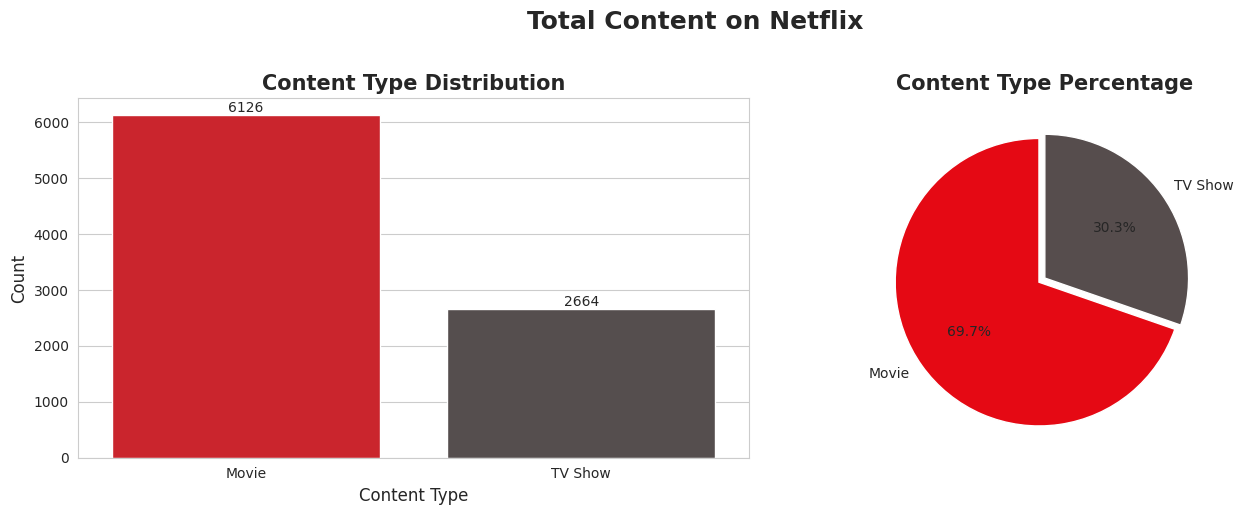


[4.2] Rating Distribution Analysis
--------------------------------------------------------------------------------
All Ratings:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


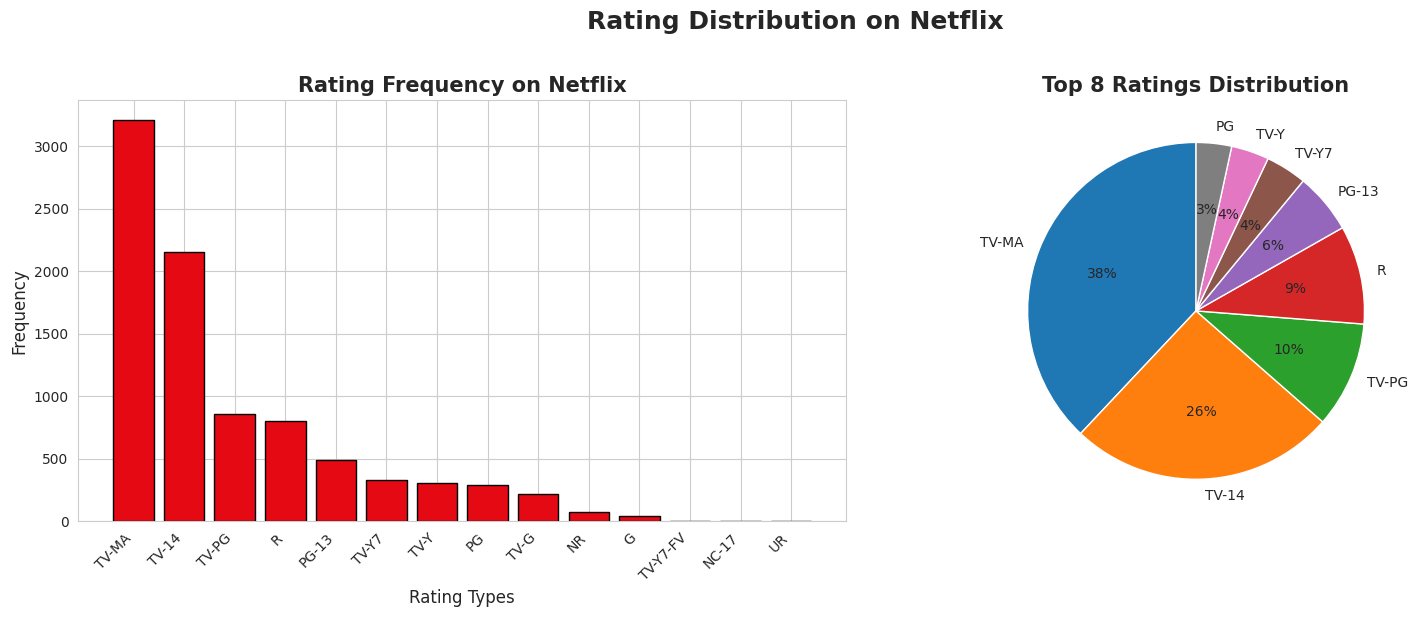


[4.3] Top 10 Countries with Most Content
--------------------------------------------------------------------------------
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


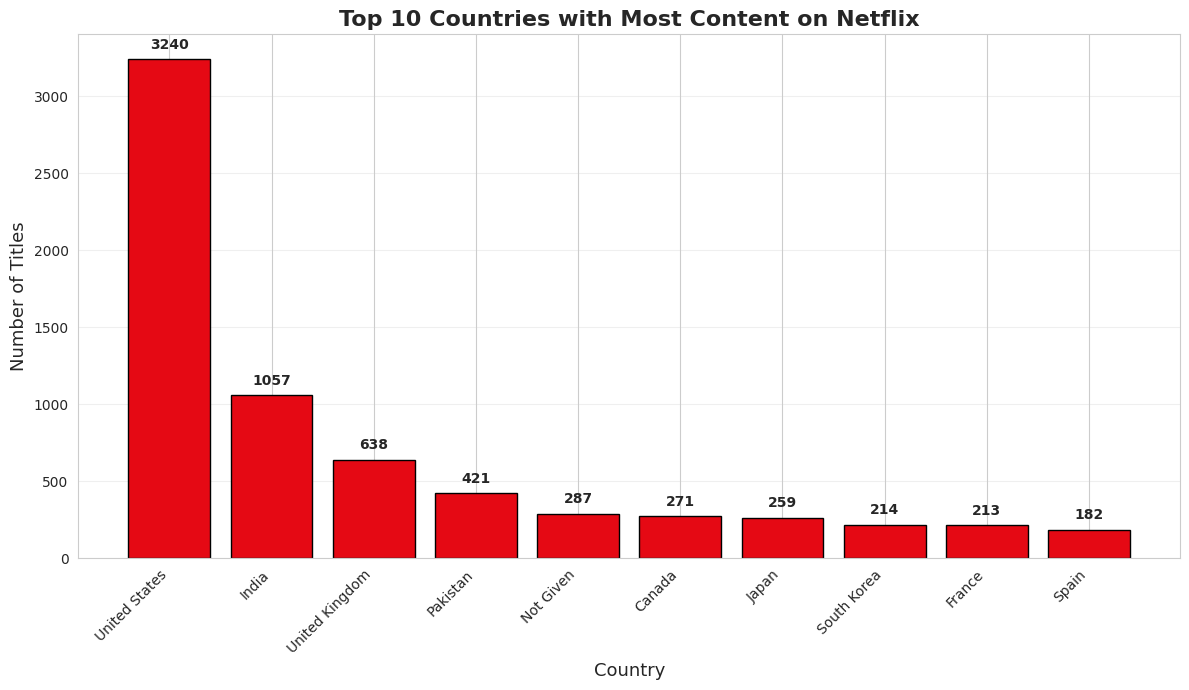


[4.4] Yearly Content Addition to Netflix
--------------------------------------------------------------------------------
Content added from 2008 to 2021


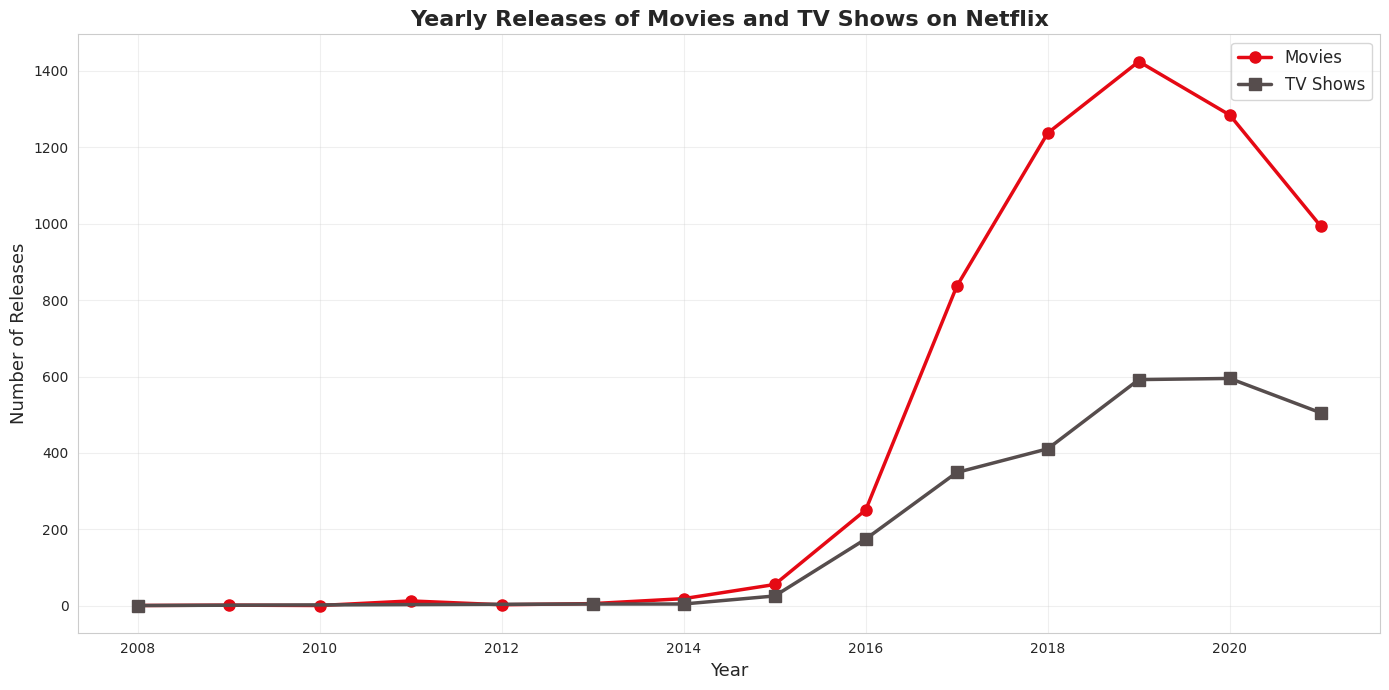


[4.5] Monthly Content Addition Pattern
--------------------------------------------------------------------------------


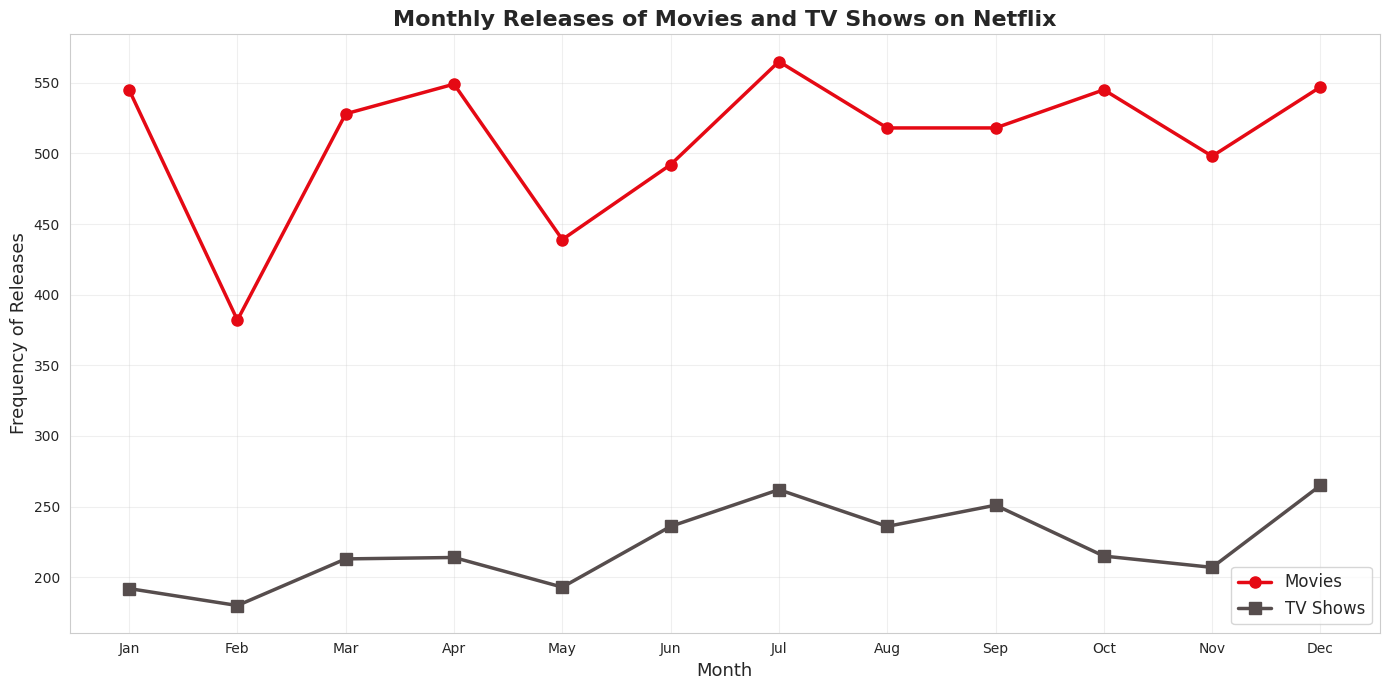


[4.6] Top 10 Popular Movie Genres
--------------------------------------------------------------------------------
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64


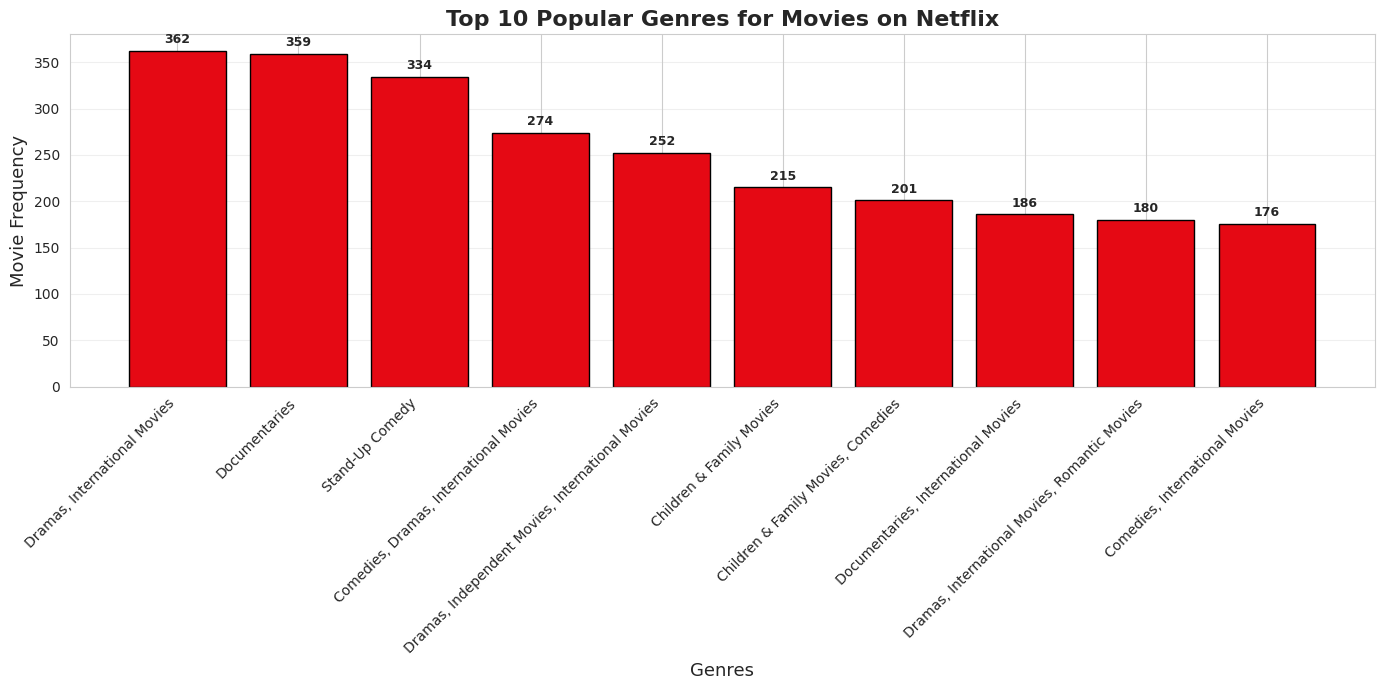


[4.7] Top 10 Popular TV Show Genres
--------------------------------------------------------------------------------
listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64


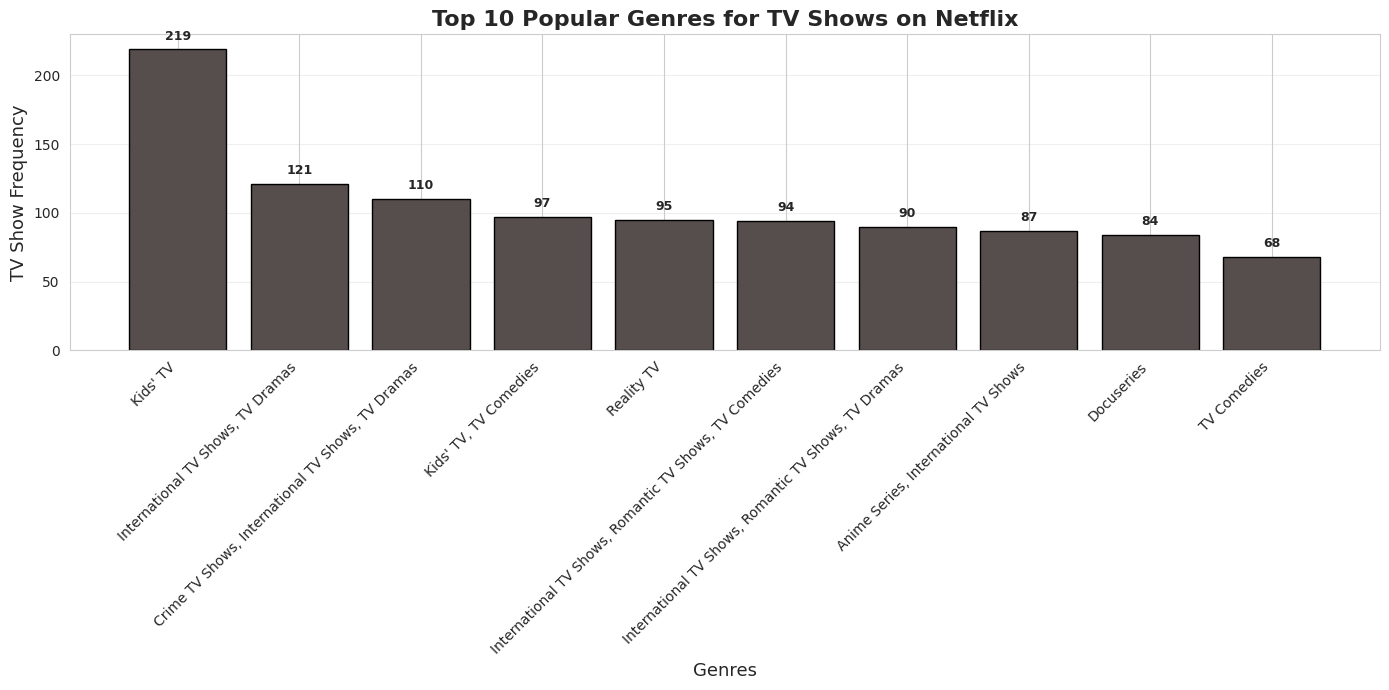


[4.8] Top 15 Directors with Most Content
--------------------------------------------------------------------------------
director
Rajiv Chilaka                   20
Raúl Campos, Jan Suter          18
Alastair Fothergill             18
Suhas Kadav                     16
Marcus Raboy                    16
Jay Karas                       14
Cathy Garcia-Molina             13
Youssef Chahine                 12
Martin Scorsese                 12
Jay Chapman                     12
Steven Spielberg                11
Don Michael Paul                10
Mark Thornton, Todd Kauffman    10
David Dhawan                     9
Kunle Afolayan                   8
Name: count, dtype: int64


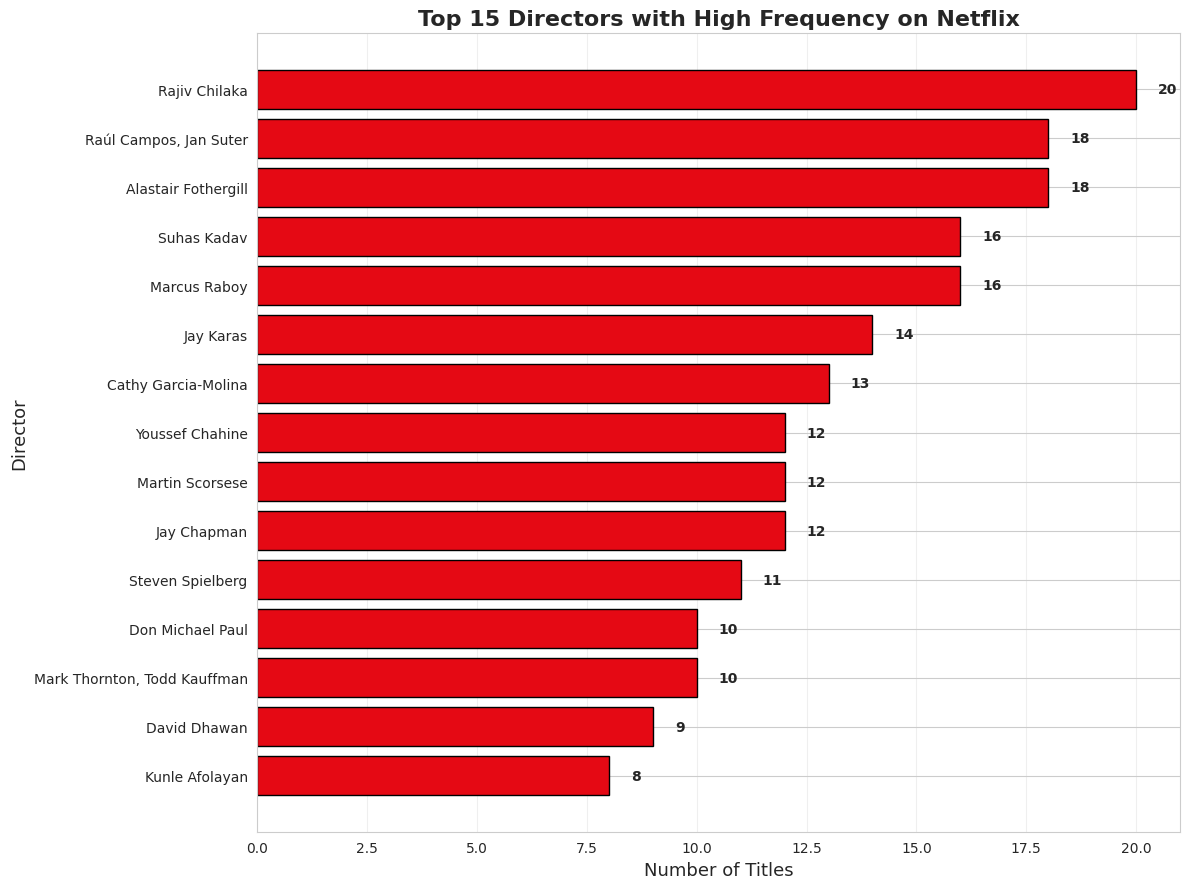


[4.9] Content by Release Year
--------------------------------------------------------------------------------
Content from 1925 to 2021


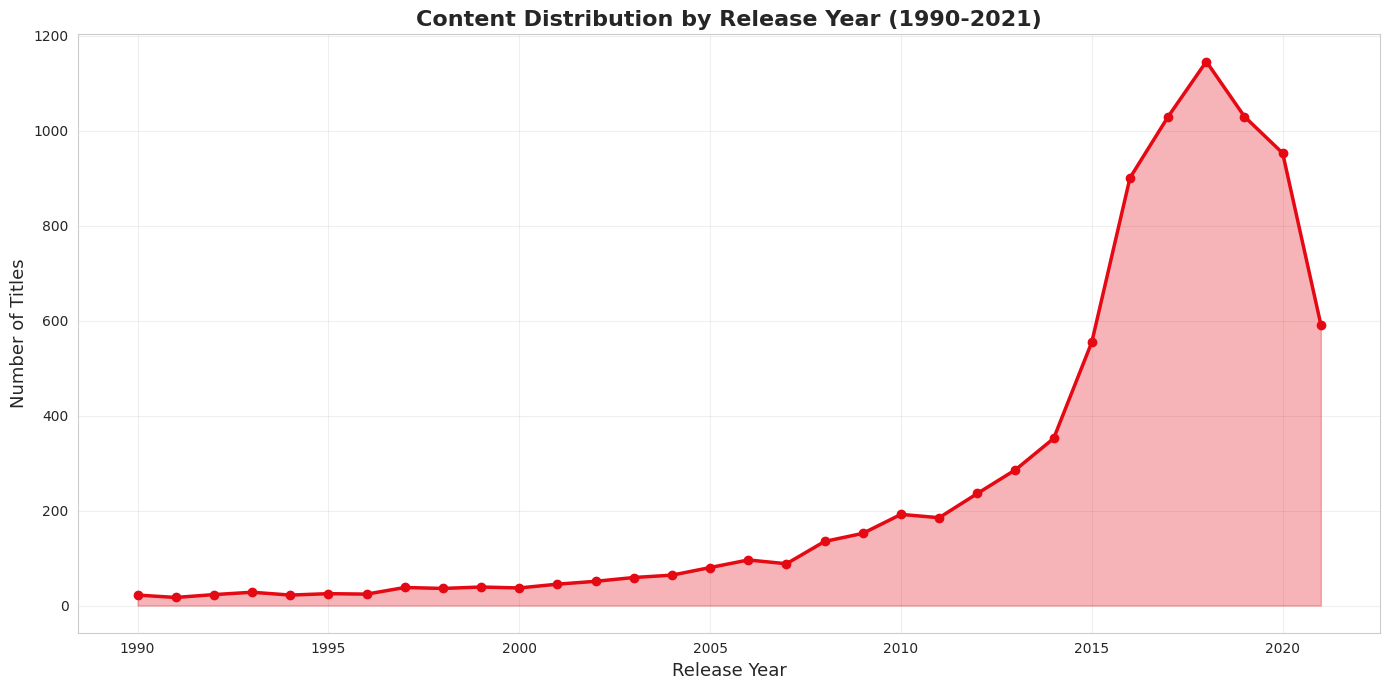


[4.10] Word Cloud Visualization
--------------------------------------------------------------------------------


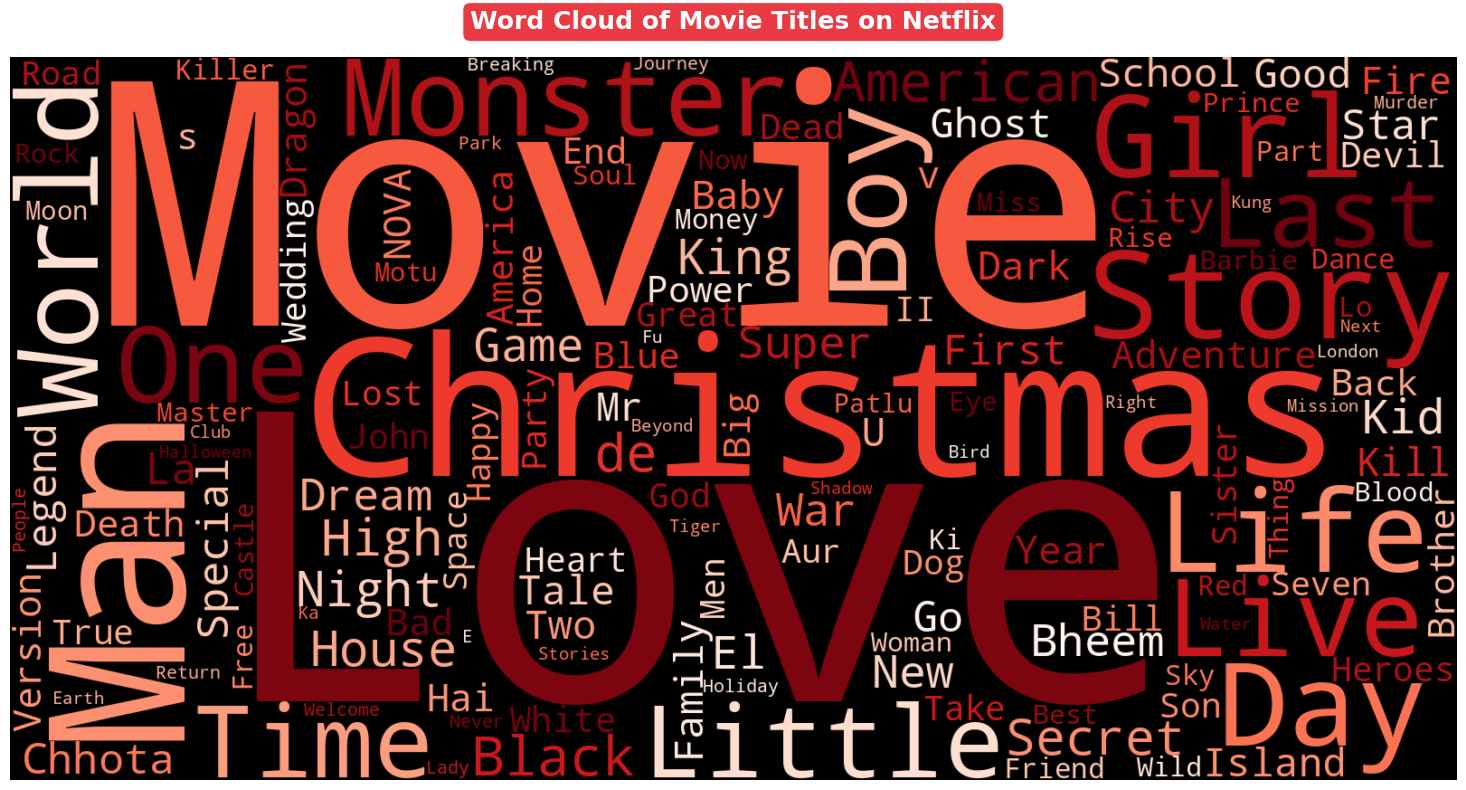


[4.11] Duration Analysis
--------------------------------------------------------------------------------
Sample duration values:
duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

[4.12] Content Addition by Day of Month
--------------------------------------------------------------------------------


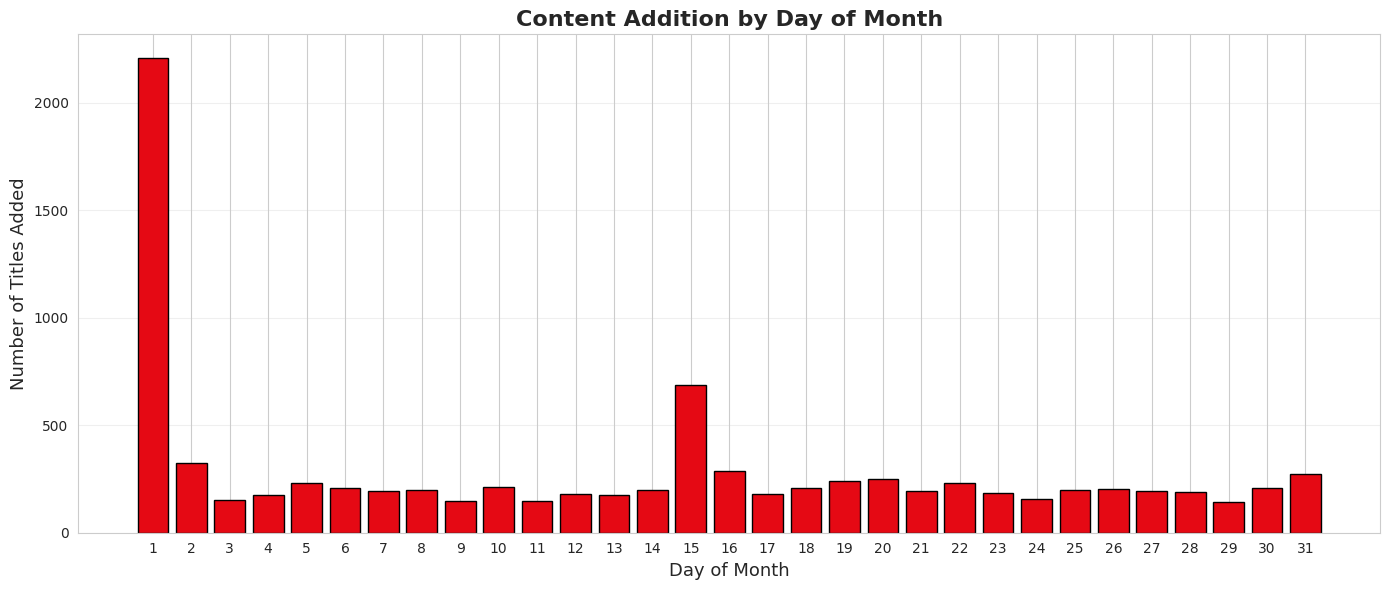

In [5]:
# STEP 4: Exploratory Data Analysis (EDA)

print("\n" + "=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# 4.1 Content Type Distribution
print("\n[4.1] Content Type Distribution")
print("-" * 80)
content_counts = data['type'].value_counts()
print(content_counts)
print(f"\nMovies: {content_counts['Movie']} ({content_counts['Movie']/len(data)*100:.1f}%)")
print(f"TV Shows: {content_counts['TV Show']} ({content_counts['TV Show']/len(data)*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.countplot(data=data, x='type', ax=axes[0], palette=['#E50914', '#564d4d'])
axes[0].set_title('Content Type Distribution', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Content Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#E50914', '#564d4d']
axes[1].pie(content_counts.values, labels=content_counts.index,
            autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
axes[1].set_title('Content Type Percentage', fontsize=15, fontweight='bold')

plt.suptitle('Total Content on Netflix', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('1_content_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 Rating Distribution
print("\n[4.2] Rating Distribution Analysis")
print("-" * 80)
ratings = data['rating'].value_counts()
print("All Ratings:")
print(ratings)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
ratings_sorted = ratings.sort_values(ascending=False)
axes[0].bar(ratings_sorted.index, ratings_sorted.values, color='#E50914', edgecolor='black')
axes[0].set_title('Rating Frequency on Netflix', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Rating Types', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
plt.setp(axes[0].xaxis.get_majorticklabels(), ha='right')

# Pie chart (top 8)
top_8_ratings = ratings.head(8)
axes[1].pie(top_8_ratings.values, labels=top_8_ratings.index,
            autopct='%1.0f%%', startangle=90)
axes[1].set_title('Top 8 Ratings Distribution', fontsize=15, fontweight='bold')

plt.suptitle('Rating Distribution on Netflix', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('2_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.3 Top Countries Analysis
print("\n[4.3] Top 10 Countries with Most Content")
print("-" * 80)
top_countries = data['country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(12, 7))
plt.bar(top_countries.index, top_countries.values, color='#E50914', edgecolor='black')
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_countries.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('3_top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.4 Yearly Releases Analysis
print("\n[4.4] Yearly Content Addition to Netflix")
print("-" * 80)
yearly_movie = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_tv = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

print(f"Content added from {yearly_movie.index.min()} to {yearly_movie.index.max()}")

plt.figure(figsize=(14, 7))
plt.plot(yearly_movie.index, yearly_movie.values, marker='o', linewidth=2.5,
         label='Movies', color='#E50914', markersize=8)
plt.plot(yearly_tv.index, yearly_tv.values, marker='s', linewidth=2.5,
         label='TV Shows', color='#564d4d', markersize=8)
plt.title('Yearly Releases of Movies and TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Releases', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('4_yearly_releases.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.5 Monthly Releases Pattern
print("\n[4.5] Monthly Content Addition Pattern")
print("-" * 80)
monthly_movie = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_tv = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 7))
plt.plot(monthly_movie.index, monthly_movie.values, marker='o', linewidth=2.5,
         label='Movies', color='#E50914', markersize=8)
plt.plot(monthly_tv.index, monthly_tv.values, marker='s', linewidth=2.5,
         label='TV Shows', color='#564d4d', markersize=8)
plt.title('Monthly Releases of Movies and TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Frequency of Releases', fontsize=13)
plt.xticks(range(1, 13), months)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('5_monthly_releases.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.6 Genre Analysis - Movies
print("\n[4.6] Top 10 Popular Movie Genres")
print("-" * 80)
movie_genres = data[data['type'] == 'Movie'].groupby('listed_in').size().sort_values(ascending=False).head(10)
print(movie_genres)

plt.figure(figsize=(14, 7))
plt.bar(range(len(movie_genres)), movie_genres.values, color='#E50914', edgecolor='black')
plt.title('Top 10 Popular Genres for Movies on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Genres', fontsize=13)
plt.ylabel('Movie Frequency', fontsize=13)
plt.xticks(range(len(movie_genres)), movie_genres.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(movie_genres.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.savefig('6_movie_genres.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.7 Genre Analysis - TV Shows
print("\n[4.7] Top 10 Popular TV Show Genres")
print("-" * 80)
tv_genres = data[data['type'] == 'TV Show'].groupby('listed_in').size().sort_values(ascending=False).head(10)
print(tv_genres)

plt.figure(figsize=(14, 7))
plt.bar(range(len(tv_genres)), tv_genres.values, color='#564d4d', edgecolor='black')
plt.title('Top 10 Popular Genres for TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Genres', fontsize=13)
plt.ylabel('TV Show Frequency', fontsize=13)
plt.xticks(range(len(tv_genres)), tv_genres.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(tv_genres.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.savefig('7_tv_show_genres.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.8 Top Directors Analysis
print("\n[4.8] Top 15 Directors with Most Content")
print("-" * 80)
# Exclude 'Not Given' if present
directors = data[data['director'] != 'Not Given']['director'].value_counts().head(15)
print(directors)

plt.figure(figsize=(12, 9))
plt.barh(range(len(directors)), directors.values, color='#E50914', edgecolor='black')
plt.title('Top 15 Directors with High Frequency on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.yticks(range(len(directors)), directors.index)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(directors.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('8_top_directors.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.9 Release Year Distribution
print("\n[4.9] Content by Release Year")
print("-" * 80)
release_years = data['release_year'].value_counts().sort_index()
print(f"Content from {release_years.index.min()} to {release_years.index.max()}")

# Focus on recent content (1990 onwards)
recent_content = release_years[release_years.index >= 1990]

plt.figure(figsize=(14, 7))
plt.plot(recent_content.index, recent_content.values, linewidth=2.5,
         color='#E50914', marker='o', markersize=6)
plt.fill_between(recent_content.index, recent_content.values, alpha=0.3, color='#E50914')
plt.title('Content Distribution by Release Year (1990-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=13)
plt.ylabel('Number of Titles', fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('9_release_year_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.10 Word Cloud of Movie Titles
print("\n[4.10] Word Cloud Visualization")
print("-" * 80)
movie_titles = ' '.join(data[data['type'] == 'Movie']['title'].astype(str))

wordcloud = WordCloud(width=1600, height=800,
                      background_color='black',
                      colormap='Reds',
                      max_words=150,
                      collocations=False).generate(movie_titles)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles on Netflix', fontsize=18, fontweight='bold',
          color='white', bbox=dict(boxstyle='round', facecolor='#E50914', alpha=0.8), pad=20)
plt.tight_layout()
plt.savefig('10_movie_wordcloud.png', dpi=300, bbox_inches='tight', facecolor='black')
plt.show()

# 4.11 Duration Analysis (if applicable)
print("\n[4.11] Duration Analysis")
print("-" * 80)
print("Sample duration values:")
print(data['duration'].value_counts().head(10))

# 4.12 Content added by day of month
print("\n[4.12] Content Addition by Day of Month")
print("-" * 80)
day_distribution = data['day'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(day_distribution.index, day_distribution.values, color='#E50914', edgecolor='black')
plt.title('Content Addition by Day of Month', fontsize=16, fontweight='bold')
plt.xlabel('Day of Month', fontsize=13)
plt.ylabel('Number of Titles Added', fontsize=13)
plt.xticks(range(1, 32))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('11_day_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



In [6]:
# STEP 5: Key Insights and Statistics

print("\n" + "=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n📊 CONTENT OVERVIEW:")
print(f"   • Total Titles: {len(data):,}")
print(f"   • Movies: {len(data[data['type'] == 'Movie']):,} ({len(data[data['type'] == 'Movie'])/len(data)*100:.1f}%)")
print(f"   • TV Shows: {len(data[data['type'] == 'TV Show']):,} ({len(data[data['type'] == 'TV Show'])/len(data)*100:.1f}%)")

print("\n⭐ RATING ANALYSIS:")
top_rating = data['rating'].value_counts().iloc[0]
top_rating_name = data['rating'].value_counts().index[0]
print(f"   • Most Common Rating: {top_rating_name} ({top_rating:,} titles, {top_rating/len(data)*100:.1f}%)")

print("\n🌍 GEOGRAPHICAL DISTRIBUTION:")
top_country = data['country'].value_counts().iloc[0]
top_country_name = data['country'].value_counts().index[0]
print(f"   • Top Country: {top_country_name} ({top_country:,} titles, {top_country/len(data)*100:.1f}%)")

print("\n📅 TEMPORAL TRENDS:")
peak_year = data['year'].value_counts().iloc[0]
peak_year_name = data['year'].value_counts().index[0]
print(f"   • Peak Year for Additions: {int(peak_year_name)} ({peak_year:,} titles)")
peak_month = data['month'].value_counts().iloc[0]
peak_month_name = months[int(data['month'].value_counts().index[0]) - 1]
print(f"   • Peak Month for Additions: {peak_month_name} ({peak_month:,} titles)")

print("\n🎬 GENRE INSIGHTS:")
top_movie_genre = movie_genres.iloc[0]
top_movie_genre_name = movie_genres.index[0]
print(f"   • Top Movie Genre: {top_movie_genre_name} ({top_movie_genre} titles)")
top_tv_genre = tv_genres.iloc[0]
top_tv_genre_name = tv_genres.index[0]
print(f"   • Top TV Show Genre: {top_tv_genre_name} ({top_tv_genre} titles)")

print("\n🎥 DIRECTOR INSIGHTS:")
top_director = directors.iloc[0]
top_director_name = directors.index[0]
print(f"   • Most Prolific Director: {top_director_name} ({top_director} titles)")

print("\n📈 RELEASE YEAR INSIGHTS:")
oldest = data['release_year'].min()
newest = data['release_year'].max()
print(f"   • Content Release Range: {int(oldest)} - {int(newest)}")
print(f"   • Span: {int(newest - oldest)} years")




KEY INSIGHTS SUMMARY

📊 CONTENT OVERVIEW:
   • Total Titles: 8,790
   • Movies: 6,126 (69.7%)
   • TV Shows: 2,664 (30.3%)

⭐ RATING ANALYSIS:
   • Most Common Rating: TV-MA (3,205 titles, 36.5%)

🌍 GEOGRAPHICAL DISTRIBUTION:
   • Top Country: United States (3,240 titles, 36.9%)

📅 TEMPORAL TRENDS:
   • Peak Year for Additions: 2019 (2,016 titles)
   • Peak Month for Additions: Jul (827 titles)

🎬 GENRE INSIGHTS:
   • Top Movie Genre: Dramas, International Movies (362 titles)
   • Top TV Show Genre: Kids' TV (219 titles)

🎥 DIRECTOR INSIGHTS:
   • Most Prolific Director: Rajiv Chilaka (20 titles)

📈 RELEASE YEAR INSIGHTS:
   • Content Release Range: 1925 - 2021
   • Span: 96 years


In [7]:
# STEP 6: Save Cleaned Dataset

print("\n" + "=" * 80)
print("SAVING PROCESSED DATA")
print("=" * 80)

# Save cleaned data
output_file = 'netflix_cleaned_data.csv'
data.to_csv(output_file, index=False)
print(f"✓ Cleaned dataset saved as '{output_file}'")

# Create a summary report
summary_data = {
    'Metric': ['Total Titles', 'Movies', 'TV Shows', 'Top Rating', 'Top Country',
               'Peak Year', 'Top Movie Genre', 'Top Director', 'Oldest Content', 'Newest Content'],
    'Value': [len(data), len(data[data['type'] == 'Movie']), len(data[data['type'] == 'TV Show']),
              top_rating_name, top_country_name, int(peak_year_name),
              top_movie_genre_name, top_director_name, int(oldest), int(newest)]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('netflix_summary_report.csv', index=False)
print(f"✓ Summary report saved as 'netflix_summary_report.csv'")

print("\n" + "=" * 80)
print("🎉 ANALYSIS COMPLETE!")
print("=" * 80)

print("\n📁 Generated Files:")
print("   1. netflix_cleaned_data.csv - Cleaned dataset")
print("   2. netflix_summary_report.csv - Summary statistics")
print("   3. 1_content_type_distribution.png")
print("   4. 2_rating_distribution.png")
print("   5. 3_top_countries.png")
print("   6. 4_yearly_releases.png")
print("   7. 5_monthly_releases.png")
print("   8. 6_movie_genres.png")
print("   9. 7_tv_show_genres.png")
print("   10. 8_top_directors.png")
print("   11. 9_release_year_distribution.png")
print("   12. 10_movie_wordcloud.png")
print("   13. 11_day_distribution.png")

print("\n" + "=" * 80)
print("Thank you for using this Netflix Data Analysis tool!")
print("=" * 80)


SAVING PROCESSED DATA
✓ Cleaned dataset saved as 'netflix_cleaned_data.csv'
✓ Summary report saved as 'netflix_summary_report.csv'

🎉 ANALYSIS COMPLETE!

📁 Generated Files:
   1. netflix_cleaned_data.csv - Cleaned dataset
   2. netflix_summary_report.csv - Summary statistics
   3. 1_content_type_distribution.png
   4. 2_rating_distribution.png
   5. 3_top_countries.png
   6. 4_yearly_releases.png
   7. 5_monthly_releases.png
   8. 6_movie_genres.png
   9. 7_tv_show_genres.png
   10. 8_top_directors.png
   11. 9_release_year_distribution.png
   12. 10_movie_wordcloud.png
   13. 11_day_distribution.png

Thank you for using this Netflix Data Analysis tool!
